In [14]:
from intake import open_catalog
import datetime
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import scipy.io
import gsw
import gcsfs
import xarray as xr
import rclv
from copy import deepcopy
from skimage import measure
from matplotlib import pyplot as plt
import pickle
import gcsfs

%matplotlib inline

In [16]:
gcs = gcsfs.GCSFileSystem(requester_pays=True)

In [92]:
year = 2010
mon = 1

timestr = str(year) + '-' + str(mon).zfill(2) + '-01'
namestr = 'gs://pangeo-rclv-eddies/float_trajectories/' + timestr + '.zarr'
print(namestr)

ds = xr.open_zarr(gcs.get_mapper(namestr))

n_time = 3
# R1 ------------------------------
xx0 = 100; xx1 = 120;
yy0 = 0; yy1 = 25;

lx0 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[0, :, :]
lx1 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[n_time, :, :]

ly0 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[0, :, :]
ly1 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[n_time, :, :]


lxt = (lx0.values, lx1.values)
lyt = (ly0.values, ly1.values)

lavd = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).lavd[n_time, :, :].to_masked_array().filled(0)

gs://pangeo-rclv-eddies/float_trajectories/2010-01-01.zarr


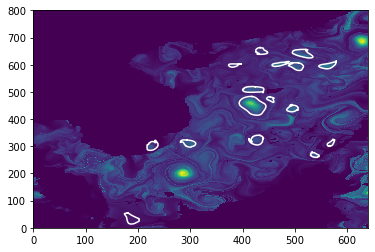

In [93]:
path = '/home/jovyan/RCLVs/SCS/rclv_info/'

kk = 0

time_str = str(year) + '-' + str(mon).zfill(2) + '-01'
filename = path + 'rclv30_' + time_str + '.bin'
fn = open(filename, 'rb')
contours = pickle.load(fn)

plt.pcolormesh(lavd)
for i in np.arange(0, len(contours), 1):
    data = contours[i][1]
    plt.plot(data[:,1], data[:,0], color='w', linewidth=1.5)

In [94]:
all_contours = [r[1] for r in contours]
labels = rclv.label_points_in_contours(lavd.shape, all_contours)
labels[labels>0] = 1
#labels = np.ma.masked_array(labels, mask=labels==0)

In [95]:
pos_x0 = lx0.values * labels
pos_y0 = ly0.values * labels

pos_x1 = lx1.values * labels
pos_y1 = ly1.values * labels

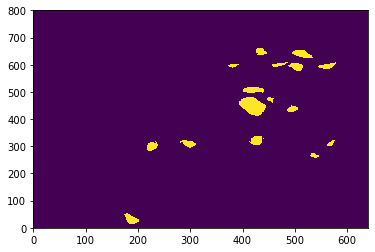

In [61]:
plt.pcolormesh(labels)

In [90]:
year = 2006
mon = 4

timestr = str(year) + '-' + str(mon).zfill(2) + '-01'
namestr = 'gs://pangeo-rclv-eddies/float_trajectories/' + timestr + '.zarr'
print(namestr)

ds2 = xr.open_zarr(gcs.get_mapper(namestr))

n_time = 6
# R1 ------------------------------
xx0 = 100; xx1 = 120;
yy0 = 0; yy1 = 25;

lx0 = ds2.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[0, :, :]
lx1 = ds2.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[n_time, :, :]

ly0 = ds2.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[0, :, :]
ly1 = ds2.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[n_time, :, :]

path = '/home/jovyan/RCLVs/SCS/rclv_info/'

kk = 0

time_str = str(year) + '-' + str(mon).zfill(2) + '-01'
filename = path + 'rclv60_' + time_str + '.bin'
fn = open(filename, 'rb')
contours2 = pickle.load(fn)


all_contours2 = [r[1] for r in contours2]
labels = rclv.label_points_in_contours(lavd.shape, all_contours2)
labels[labels>0] = 1

pos60_x0 = lx0.values * labels
pos60_y0 = ly0.values * labels

pos60_x1 = lx1.values * labels
pos60_y1 = ly1.values * labels

gs://pangeo-rclv-eddies/float_trajectories/2006-04-01.zarr


In [29]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds_aviso  = cat["sea_surface_height"].to_dask()

In [54]:
import cartopy.feature as cft
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='dimgrey', linewidth=0.5)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(105, 23.5, '(b)')

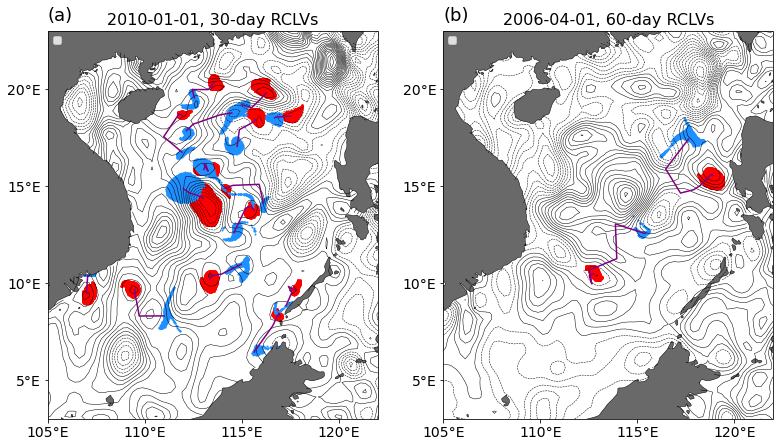

In [100]:
lev1 = np.arange(-1, 1.01, 0.02)

fig = plt.figure(figsize=(13, 8))

map_proj = ccrs.PlateCarree()

ax1 = plt.subplot(1, 2, 1, projection=map_proj)
ax1.add_feature(land_50m)
ax1.set_extent([99.9, 122, 2, 25.1], crs=map_proj)

ds_aviso.sel(longitude=slice(100, 130), latitude=slice(0, 28), time='2010-01-01').sla.plot.contour(levels=lev1, colors='k', linewidths=0.5)

ax1.scatter(pos_x0, pos_y0, s=3, color='r')
ax1.scatter(pos_x1, pos_y1, s=1, color='dodgerblue')

for num in np.arange(len(contours)):
    tmp = contours[num][0]
    lontmp = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[:4, tmp[0], tmp[1]].values
    lattmp = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[:4, tmp[0], tmp[1]].values

    plt.plot(lontmp, lattmp, color='purple')
    kk = kk + 1

plt.legend(loc=2)

tick_proj = ccrs.PlateCarree()
xvalues = np.arange(100, 125, 5)
yvalues = np.arange(0, 26, 5)

ax1.set_xticks(xvalues, crs=tick_proj)
ax1.set_yticks(yvalues, crs=tick_proj)

ax1.set_xticklabels(xvalues, fontsize=14)
ax1.set_yticklabels(yvalues, fontsize=14)

ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LongitudeFormatter())

plt.xlabel('')
plt.ylabel('')
plt.xlim(105, 122)
plt.ylim(3, 23)
plt.title('2010-01-01, 30-day RCLVs', size=16)

plt.text(105, 23.5, '(a)', size=18)

ax3 = plt.subplot(1, 2, 2, projection=map_proj)

ax3.add_feature(land_50m)
ax3.set_extent([99.9, 122, 2, 25.1], crs=map_proj)

ds_aviso.sel(longitude=slice(100, 130), latitude=slice(0, 28), time='2006-04-01').sla.plot.contour(levels=lev1, colors='k', linewidths=0.5)

ax3.scatter(pos60_x0, pos60_y0, s=3, color='r')
ax3.scatter(pos60_x1, pos60_y1, s=1, color='dodgerblue')

for num in np.arange(len(contours2)):
    tmp = contours2[num][0]
    lontmp = ds2.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[:7, tmp[0], tmp[1]].values
    lattmp = ds2.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[:7, tmp[0], tmp[1]].values

    plt.plot(lontmp, lattmp, color='purple')
    kk = kk + 1

plt.legend(loc=2)
tick_proj = ccrs.PlateCarree()
xvalues = np.arange(100, 125, 5)
yvalues = np.arange(0, 26, 5)

ax3.set_xticks(xvalues, crs=tick_proj)
ax3.set_yticks(yvalues, crs=tick_proj)

ax3.set_xticklabels(xvalues, fontsize=14)
ax3.set_yticklabels(yvalues, fontsize=14)

ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LongitudeFormatter())

plt.xlabel('')
plt.ylabel('')
plt.xlim(105, 122)
plt.ylim(3, 23)
plt.title('2006-04-01, 60-day RCLVs', size=16)

plt.text(105, 23.5, '(b)', size=18)
